#Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

#You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
path=("/content/drive/MyDrive/austo_automobile+(2)+(1).csv")
df=pd.read_csv(path)

## **What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)**


### **EDA and Data- Processing**

In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [7]:
df.shape

(1581, 14)

## **Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [10]:
df.isnull().sum()


Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [11]:
df.shape

(1581, 14)

#Missing value treatment:
* There are missing values in variables Gender and Partner_salary.
* Missing values in the partner_salary are treated using impute value function as Partner_salrary can be obtained from the difference of Total_salary and salary variables.
* Using np.where function and impute value function, missing values are treated.
* There are some discrepencies in Gender variable, they are treated using replace function.
* Missing values in Gender variable are treated using Simple Imputer and are imputed by using strategy as most_frequent.


In [12]:
df["Partner_salary"]=df["Partner_salary"].fillna(1)
Partner_salary_impute_value=(df["Total_salary"]-df["Salary"])

In [13]:
list1=df[df["Partner_salary"]==1].index
list1

Int64Index([  40,   43,   49,   59,  111,  115,  163,  164,  165,  205,
            ...
            1467, 1540, 1546, 1556, 1558, 1559, 1567, 1568, 1577, 1579],
           dtype='int64', length=106)

In [14]:
df["Partner_salary"]=np.where(df.index.isin(list1),round(Partner_salary_impute_value),df["Partner_salary"])

In [15]:
df["Gender"].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [16]:
df["Gender"]=df["Gender"].replace(["Femal","Femle"],"Female")

In [17]:
df["Gender"].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [18]:
df_num=df.select_dtypes(["float64","int64"])
df_cat=df.select_dtypes(["object"])

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imr=imputer.fit(df_cat)
df_cat=pd.DataFrame(imr.transform(df_cat),columns=df_cat.columns)

In [20]:
df_new=pd.concat([df_num,df_cat],axis=1,join="inner")
df=df_new

In [21]:
df.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,53,4,99300,70700.0,170000,61000,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,53,4,95500,70300.0,165800,61000,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,53,3,97300,60700.0,158000,57000,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,53,2,72500,70300.0,142800,61000,Female,Salaried,Married,Graduate,Yes,No,Yes,SUV
4,53,3,79700,60200.0,139900,57000,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


In [38]:
df.isnull().sum()

Age                 0
No_of_Dependents    0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Gender              0
Profession          0
Marital_status      0
Education           0
Personal_loan       0
House_loan          0
Partner_working     0
Make                0
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [24]:
df["Age"].mode()

0    28
Name: Age, dtype: int64

In [25]:
df["No_of_Dependents"].mode()

0    2
1    3
Name: No_of_Dependents, dtype: int64

In [26]:
df["Salary"].mode()

0    52000
1    56400
Name: Salary, dtype: int64

In [27]:
df["Partner_salary"].mode()

0    0.0
Name: Partner_salary, dtype: float64

In [28]:
df["Total_salary"].mode()

0    57100
Name: Total_salary, dtype: int64

In [29]:
df["Price"].mode()

0    32000
Name: Price, dtype: int64

In [30]:
pd.crosstab([df["Gender"],df["Profession"]],[df["Marital_status"],df["Education"]])

Marital_status     Married                 Single              
Education         Graduate Post Graduate Graduate Post Graduate
Gender Profession                                              
Female Business         35            61        2             7
       Salaried         95           116        6             7
Male   Business        192           326       20            42
       Salaried        229           389       17            37

In [31]:
pd.crosstab([df["Personal_loan"],df["House_loan"]],[df["Partner_working"],df["Make"]])

Partner_working                 No                 Yes          
Make                     Hatchback SUV Sedan Hatchback SUV Sedan
Personal_loan House_loan                                        
No            No                82  85    71        90  85   127
              Yes               53   6    51        66   5    68
Yes           No                93  50   100        82  55   134
              Yes               53   3    66        63   8    85

In [32]:
pd.crosstab([df["Gender"],df["Profession"]],[df["Partner_working"],df["Make"]])

Partner_working          No                 Yes          
Make              Hatchback SUV Sedan Hatchback SUV Sedan
Gender Profession                                        
Female Business           0  24    20         0  31    30
       Salaried           7  56    44         8  62    47
Male   Business         143  16   101       147  18   155
       Salaried         131  48   123       146  42   182

In [33]:
pd.crosstab([df["Gender"],df["Profession"]],[df["Personal_loan"],df["House_loan"]])

Personal_loan       No       Yes     
House_loan          No  Yes   No  Yes
Gender Profession                    
Female Business     45    9   33   18
       Salaried     91   35   75   23
Male   Business    177   91  201  111
       Salaried    227  114  205  126

In [34]:
pd.crosstab([df["Marital_status"],df["Education"]],[df["Personal_loan"],df["House_loan"]])

Personal_loan                  No       Yes     
House_loan                     No  Yes   No  Yes
Marital_status Education                        
Married        Graduate       182   84  183  102
               Post Graduate  312  145  278  157
Single         Graduate        12   10   17    6
               Post Graduate   34   10   36   13

In [35]:
pd.crosstab([df["Marital_status"],df["Education"]],[df["Partner_working"],df["Make"]])

Partner_working                     No                 Yes          
Make                         Hatchback SUV Sedan Hatchback SUV Sedan
Marital_status Education                                            
Married        Graduate             71  43    97       117  69   154
               Post Graduate       126  85   153       184  84   260
Single         Graduate             32   5     8         0   0     0
               Post Graduate        52  11    30         0   0     0

## **Uni-Variate Analysis**
## **Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.**

<Figure size 600x400 with 0 Axes>

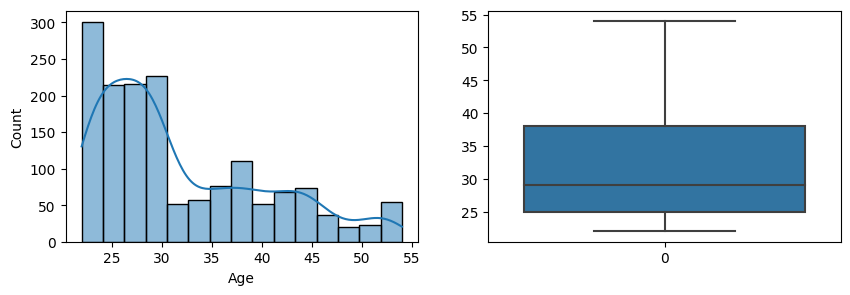

In [36]:
plt.figure(figsize=(6,4,))
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,3)
sns.histplot(df["Age"],kde=True,ax=axes[0]);
sns.boxplot(df["Age"],ax=axes[1]);
plt.show()

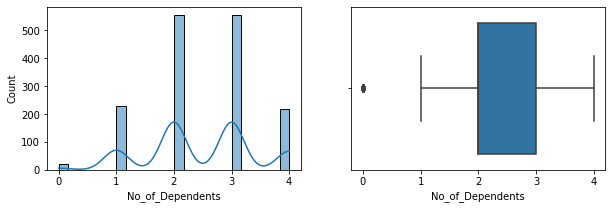

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,3)
sns.histplot(df["No_of_Dependents"],kde=True,ax=axes[0])
sns.boxplot(df["No_of_Dependents"],ax=axes[1])
plt.show()

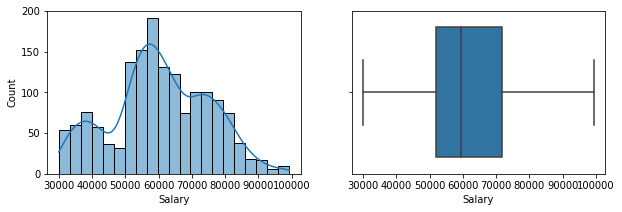

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,3)
sns.histplot(df["Salary"],kde=True,ax=axes[0])
sns.boxplot(df["Salary"],ax=axes[1])
plt.show()

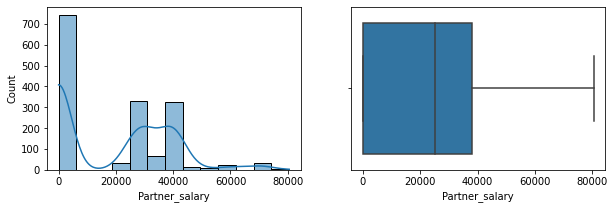

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,3)
sns.histplot(df["Partner_salary"],kde=True,ax=axes[0])
sns.boxplot(df["Partner_salary"],ax=axes[1])
plt.show()

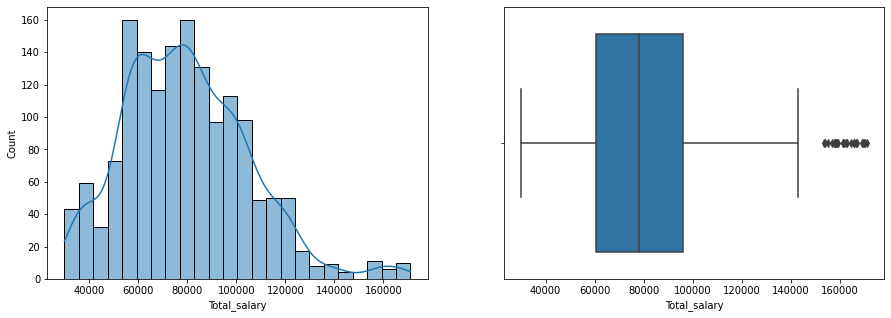

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df["Total_salary"],kde=True,ax=axes[0])
sns.boxplot(df["Total_salary"],ax=axes[1])
plt.show()

In [39]:
def detect_outlier(col):
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range, upper_range

In [40]:
lr,ur=detect_outlier(df["Total_salary"])
print("lower range",lr, "upper range",ur)

lower range 7400.0 upper range 149000.0


In [41]:
df["Total_salary"]=np.where(df["Total_salary"]>ur,ur,df["Total_salary"])
df["Total_salary"]=np.where(df["Total_salary"]<lr,lr,df["Total_salary"])

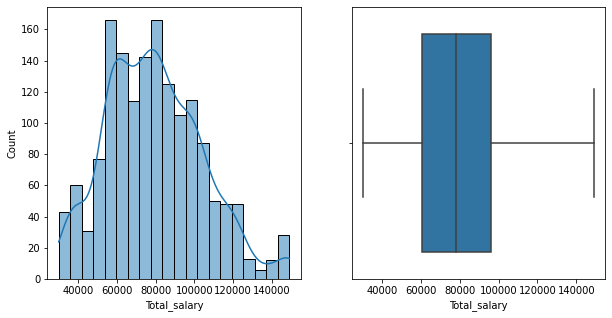

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df["Total_salary"],kde=True,ax=axes[0])
sns.boxplot(df["Total_salary"],ax=axes[1])
plt.show()

In [ ]:
df["Total_salary"].describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

In [ ]:
df["Total_salary"].mode()

0    149000.0
dtype: float64

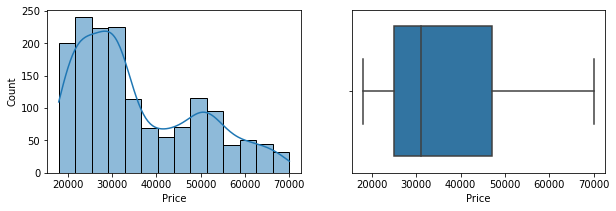

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,3)
sns.histplot(df["Price"],kde=True,ax=axes[0])
sns.boxplot(df["Price"],data=df,ax=axes[1])
plt.show()

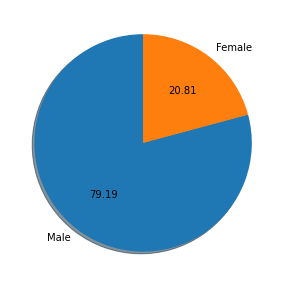

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Gender"].value_counts(),startangle=90,autopct="%.2f",labels=["Male","Female"],shadow=True);

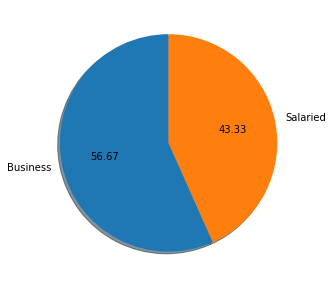

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Profession"].value_counts(),startangle=90,autopct="%.2f",labels=["Business","Salaried"],shadow=True);

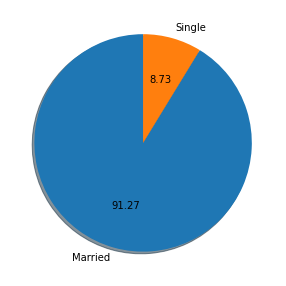

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Marital_status"].value_counts(),startangle=90,autopct="%.2f",labels=["Married","Single"],shadow=True);

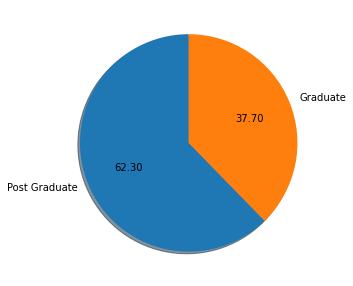

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Education"].value_counts(),startangle=90,autopct="%.2f",labels=["Post Graduate","Graduate"],shadow=True);

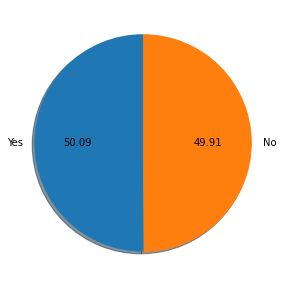

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Personal_loan"].value_counts(),startangle=90,autopct="%.2f",labels=["Yes","No"],shadow=True);

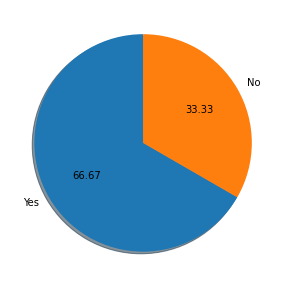

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["House_loan"].value_counts(),startangle=90,autopct="%.2f",labels=["Yes","No"],shadow=True);

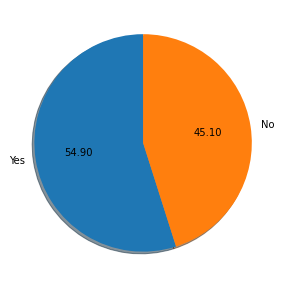

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Partner_working"].value_counts(),startangle=90,autopct="%.2f",labels=["Yes","No"],shadow=True);

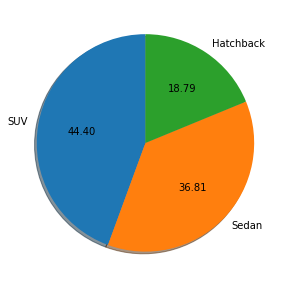

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df["Make"].value_counts(),startangle=90,autopct="%.2f",labels=["SUV","Sedan","Hatchback"],shadow=True);

#Insights from Univariate analysis:
* Age variable is right skewed, distribution of age  is from 22 to 54 years, having median value of 29 and inter quartile range is 13.
* No. of dependents have outliers, distribution is between 0 and 4, having ,median values as 2 and 3 dependents and IQR value as 1.
* Salary variable is slightly symmertical,distribution is between 30000 and 99300 and having median value as 59500 and IQR as 19900
* Partner_salary variable is completely right skewed, distribution of the data is between 0 and 80500, having median value of 25100 and IQR value as 38100.
* Total_salary variable is slightly right skewed, distribution of data is between 30000 and 149000, having median value of 78000 and IQR value of 35400.
* Price variable is right skewed, distributionof data is between 18000 and 70000, having median as 31000 and IQR value of 22000
* Gender variable consists of 79.19% males and 20.81% females.
* Profession variable consists of 56.67% Business persons and 43.33% of Salaried persons.
* Marital_status variable has 91.27% Married and 8.73% Singles.
* Education variable has 62.30% of Post graduates and 37.7% of Graduates.
* Personal_loan, consists of 50.09% of people having personal loan and 49.91% of people dont have personal loan.
* House loan variable has 66.67% of people who have house loan and 33.33% of people dont have house loan.
* Partner_working, consists of 54.9% of persons whose partner is working and 45.10% of persons whose partner is not working.
* Make, consists of 44.40% of SUVs, 36.81% of Sedans and 18.79% of Hatchbacks.



## **Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data**

<Axes: >

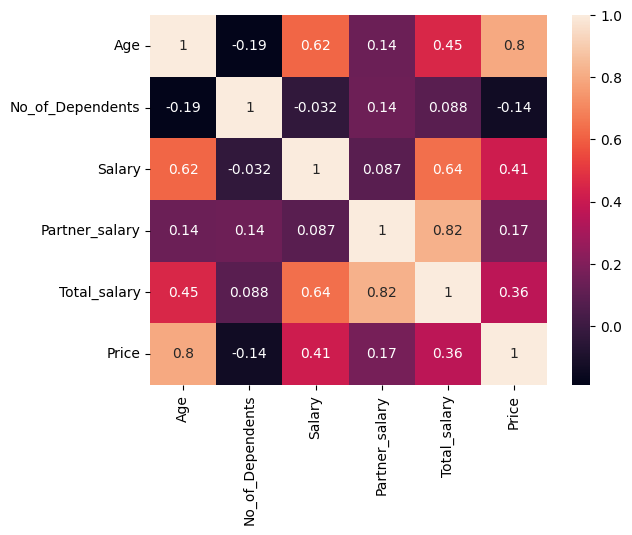

In [ ]:
sns.heatmap(data=df[["Age","No_of_Dependents","Salary","Partner_salary","Total_salary","Price"]].corr(),annot=True)

#Insights from multivariate analysis:
* The correlation between Age and Price is the
highest value as we can see it is value of 0.8.
* The next one in the correlation map which is having correlation is between Total_salary and salary which is of value 0.64 followed by the correlation between Age and salary which is of value 0.62
* There are some negatively correlated variables in the heap map, which is between No_of_Dependents and Age, with value of -0.19

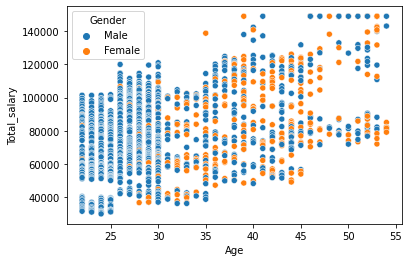

In [ ]:
sns.scatterplot(data=df,x="Age",y="Total_salary",hue="Gender")

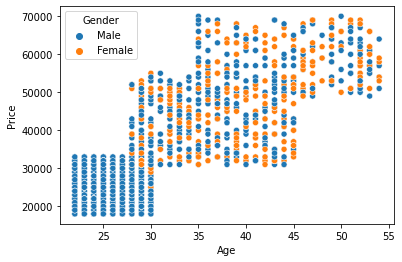

In [ ]:
sns.scatterplot(data=df,x="Age",y="Price",hue="Gender")

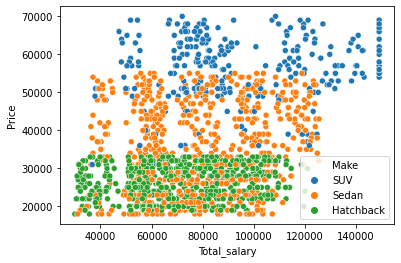

In [ ]:
sns.scatterplot(data=df,x="Total_salary",y="Price",hue="Make")

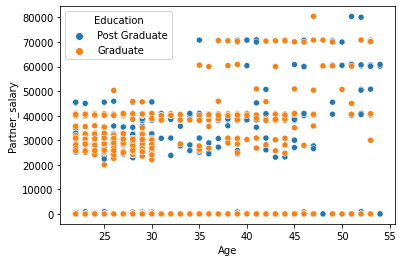

In [ ]:
sns.scatterplot(data=df,x="Age",y="Partner_salary",hue="Education")

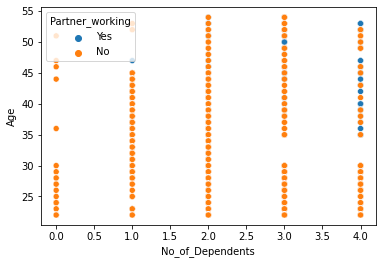

In [ ]:
sns.scatterplot(data=df,x="No_of_Dependents",y="Age",hue="Partner_working")

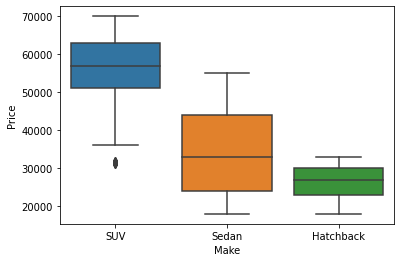

In [ ]:
sns.boxplot(data=df,x="Make",y="Price")

In [ ]:
pd.crosstab(df["Partner_working"],df["House_loan"],margins=True)

House_loan,No,Yes,All
Partner_working,,,
No,481,232,713
Yes,573,295,868
All,1054,527,1581


In [ ]:
pd.crosstab(df["House_loan"],df["Make"])

Make,Hatchback,SUV,Sedan
House_loan,,,
No,347,275,432
Yes,235,22,270


#Insights from Bivariate analysis:
* Age and total salary has low positive correlation.
* Age and Price has highly positive correlation, as the age of the person increases he is likely to buy a high priced car.
* Total salary and price has positive correlation, as the total salary increases they are likely to buy high priced cars.
* Age and partner salary has no correlation, as the age increases partner salary remains constant and vice versa.
* No of dependents and Age has low negative correlation, as the age of the person increases no. of dependents on that person decreases.
Price of SUVs are more compared to Sedan and Hatchback.

## Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available. ***E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women” ***E2) Ned Stark believes that a salaried person is more likely to buy a Sedan. ***E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [ ]:
pd.crosstab(df["Make"],df["Gender"],margins=True)

Gender,Female,Male,All
Make,,,
Hatchback,15,567,582
SUV,173,124,297
Sedan,141,561,702
All,329,1252,1581


E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”
* No, Men dont prefer SUV when compared to women.

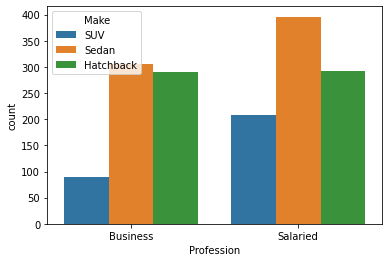

In [ ]:
sns.countplot(data=df,x="Profession",hue="Make");

In [ ]:
pd.crosstab(df["Profession"],df["Make"],margins=True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,290,89,306,685
Salaried,292,208,396,896
All,582,297,702,1581


E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.
* Yes, Salaried person is more likely to buy a Sedan

In [ ]:
pd.crosstab([df["Profession"],df["Make"]],df["Gender"])

Gender                Female  Male
Profession Make                   
Business   Hatchback       0   290
           SUV            55    34
           Sedan          50   256
Salaried   Hatchback      15   277
           SUV           118    90
           Sedan          91   305

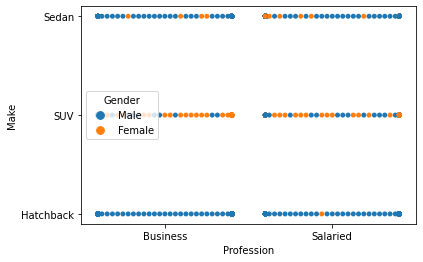

In [ ]:
sns.swarmplot(data=df,x="Profession",y="Make",hue="Gender")

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.
* No, Salaried men prefer Sedan over SUV

# F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions. Give justification along with presenting metrics/charts used for arriving at the conclusions. F1) Gender  F2)Personal_loan

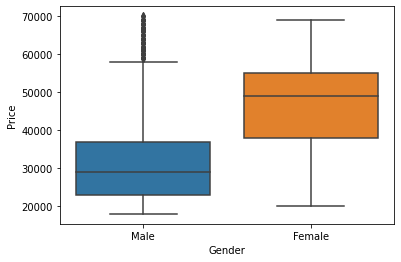

In [ ]:
sns.boxplot(data=df,x="Gender",y="Price")

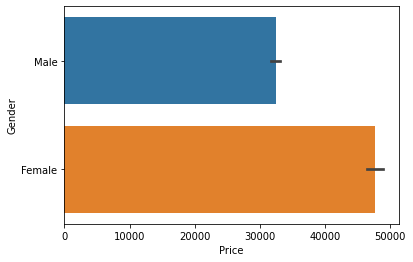

In [ ]:
sns.barplot(data=df,x="Price",y="Gender")

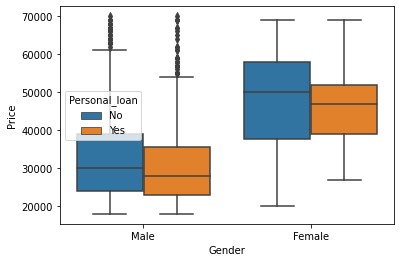

In [ ]:
sns.boxplot(data=df,x="Gender",y="Price",hue="Personal_loan")

In [ ]:
df.groupby("Gender")["Price"].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

In [ ]:
df.groupby("Gender")["Price"].min()

Gender
Female    20000
Male      18000
Name: Price, dtype: int64

In [ ]:
df.groupby("Gender")["Price"].max()

Gender
Female    69000
Male      70000
Name: Price, dtype: int64

In [ ]:
df.groupby("Gender")["Price"].median()

Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64

In [ ]:
df.groupby("Personal_loan")["Price"].mean()

Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

In [ ]:
df.groupby("Personal_loan")["Price"].min()

Personal_loan
No     18000
Yes    18000
Name: Price, dtype: int64

In [ ]:
df.groupby("Personal_loan")["Price"].max()

Personal_loan
No     70000
Yes    70000
Name: Price, dtype: int64

In [ ]:
df.groupby("Personal_loan")["Price"].median()

Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64

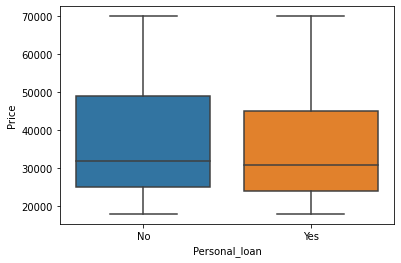

In [ ]:
sns.boxplot(data=df,x="Personal_loan",y="Price")

#F1) Gender
* The average amount spent on purchasing automobiles is higher for females when compared to the males.
* Here the average amount spent on purchasing automobiles by females is 47705 while by men it is 32416.
* The minimum,maxmimum and median amount spent on purchasing automobiles by Female is 20,000, 69,000 and 49000
* The minimum,maxmimum and median amount spent on purchasing automobiles by Male is 17,000, 70,000 and 29000
#F2) Personal loan:
* The average amount spent on purchasing automobile having taken personal loan is almost same as the people who haven’t taken the loan.
* The mean amount spent by person having Personal loan is 34457.070707.
* The mean amount spent by person who doesn’t have personal loan is 36742.712294.
* The minimum and maximum amount spent by person having personal loan is 18000 and 7000 the same goes for the persons who doesn’t have personal loans.
* The Median value of amount spent on purchasing automobile by the person having personal loan is 31000 and who doesn’t have personal loan is 32000


## **From the current data set comment if having a working partner leads to purchase of a higher priced car.**

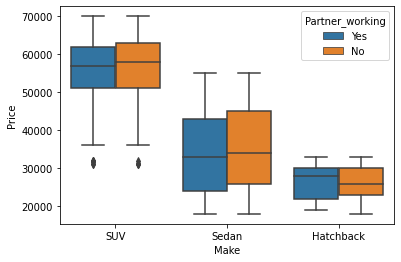

In [ ]:
sns.boxplot(data=df,x="Make",y="Price",hue="Partner_working")

In [ ]:
pd.crosstab(df["Make"],df["Partner_working"])

Partner_working,No,Yes
Make,,
Hatchback,281,301
SUV,144,153
Sedan,288,414


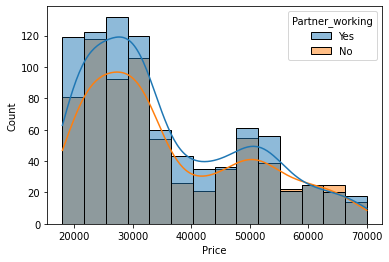

In [ ]:
sns.histplot(data=df,x="Price",hue="Partner_working",kde=True)

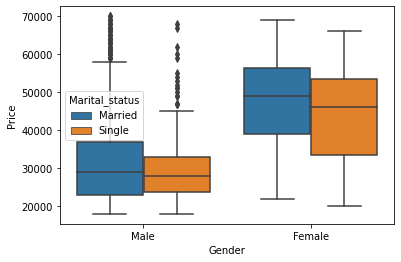

In [ ]:
sns.boxplot(data=df,x="Gender",y="Price",hue="Marital_status")

* SUV model cars are of high price and also the cars purchased by persons who have working partners who bought SUV are 153 members and who doesn’t have working partners and have bought SUV are 144. Hence, there are
chances that persons having working partner purchases high priced cars.

## **The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use Gender and Marital_status - fields to arrive at groups with similar purchase history.**

In [ ]:
pd.crosstab([df["Gender"],df["Marital_status"]],df["Make"],margins=True)

Make                   Hatchback  SUV  Sedan   All
Gender Marital_status                             
Female Married                14  166    127   307
       Single                  1    7     14    22
Male   Married               484  115    537  1136
       Single                 83    9     24   116
All                          582  297    702  1581

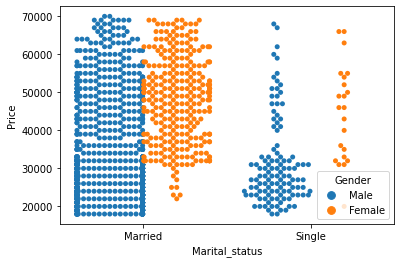

In [ ]:
sns.swarmplot(data=df,x="Marital_status",y="Price",hue="Gender",dodge=True)

#Insights:
* Married persons are in more number when compared to the singles
persons who have bought cars.
* Again Married Males are higher in number when compared to Females who have bought cars
* Mostly Sedans are bought by the married males and then the number is followed by Hatchback which are less costly than SUVs.
* Whereas in Married females, they bought SUVs more which are costlier than the two types of cars, which is followed by Sedans.
* Single men who bought cars have more Hatchback cars which are cheaper in cost than the other two type of cars.
* From this we can say that, if we focus more on married male and female while improving marketing strategy, we can sell more cars.